# Projeto - Perceptron e MLP

## 

Para resolver o primeiro mini projeto, o aluno ou o grupo de alunos (grupo de no máximo 3 pessoas) devem escolher um `dataset` a escolha de vocês ou um dos `datasets` indicados no _Drive_ da turma para realizar o projeto. A partir do `dataset` escolhido, desenvolva os itens abaixo:

__A)__ (10 pontos) Desenvolva uma análise exploratória dos dados adequada;

__B)__ (5 pontos) Faça a preparação dos dados para treinar os modelos;

__C)__ (15 pontos) Teste pelo menos 3 modelos de _Machine Learning_ convencional, sendo algumas sugestões como Regressão Logística, Árvore de Decisão, _Random Forest_ entre outros;

__D)__ (30 pontos) Desenvolva uma rede neural _Perceptron_ para fazer a separação entre as classes. O modelo consegue fazer a separação linear dos dados? Avaliar utilizando o PCA caso necessário;

__E)__ (30 pontos) Monte duas redes neurais MLP utilizando combinações de camadas diferentes (teste algumas combinações para chegar em uma melhor performance dos resultados).

__F)__ (10 pontos) Qual dos modelos teve a melhor performance entre os modelos convencionais, _Perceptron_ e MLP? Discuta um pouco a respeito.

<br>

__Entrega:__ até o dia 30/09 pelo Class (vou criar uma atividade como projeto para que vocês entreguem por lá)

__Monitoria:__ dia 20/09 e 27/09;

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

In [56]:
df = pd.read_csv("banco_train.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [57]:
pd.options.display.max_rows = 400       # Aumentando as linhas para visualização.
pd.options.display.max_columns = 400    # Aumentando as colunas.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [59]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [60]:
df.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


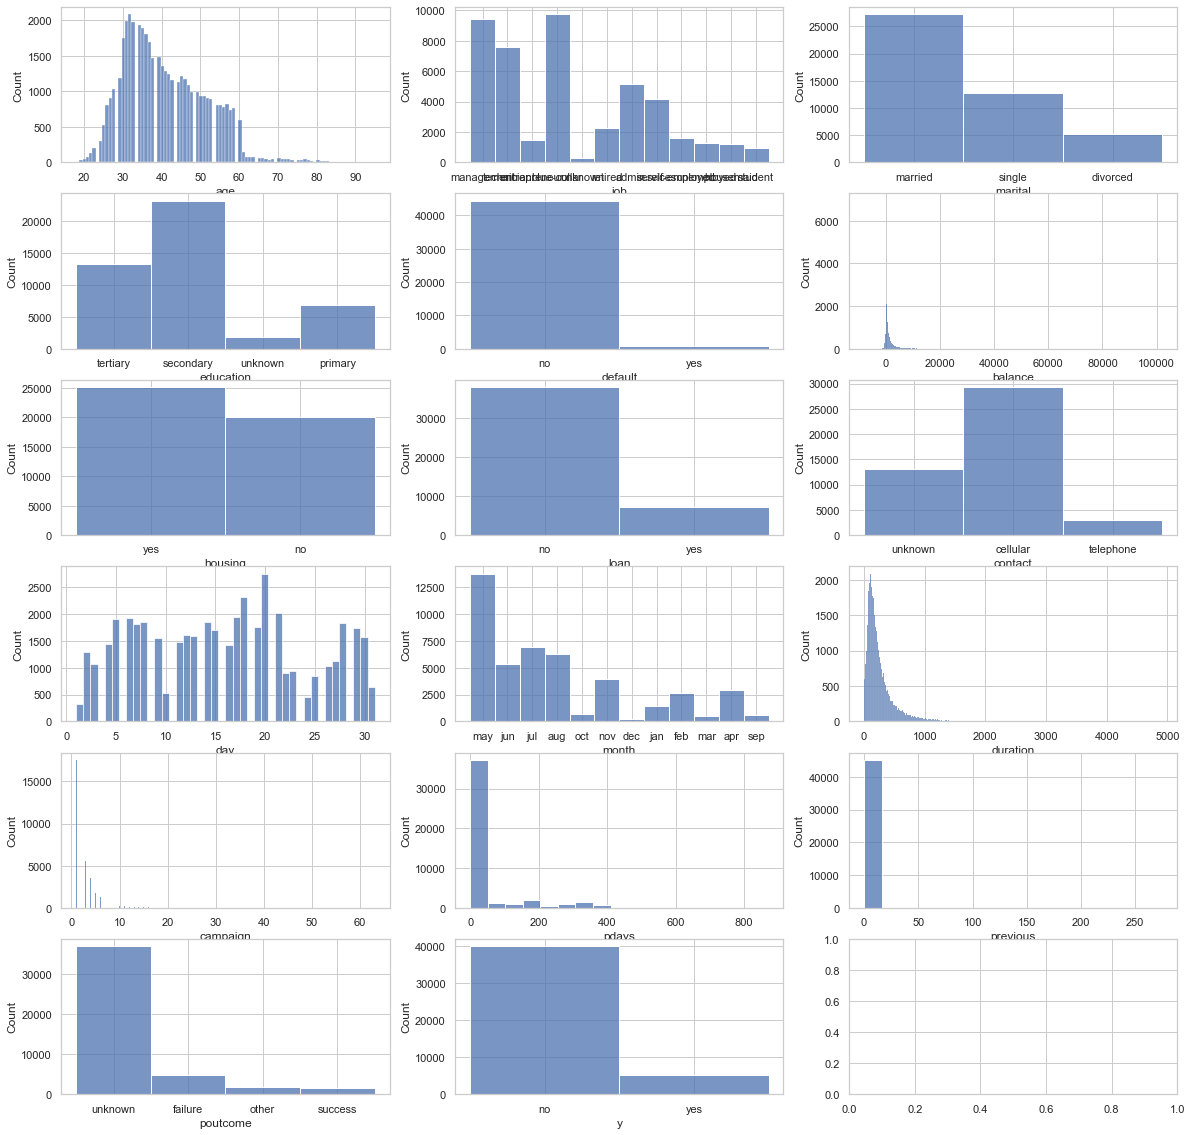

In [61]:
fig, ax = plt.subplots(6, 3, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(df):
    
    sns.histplot(df[col], ax=ax[i])

plt.show()

In [62]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


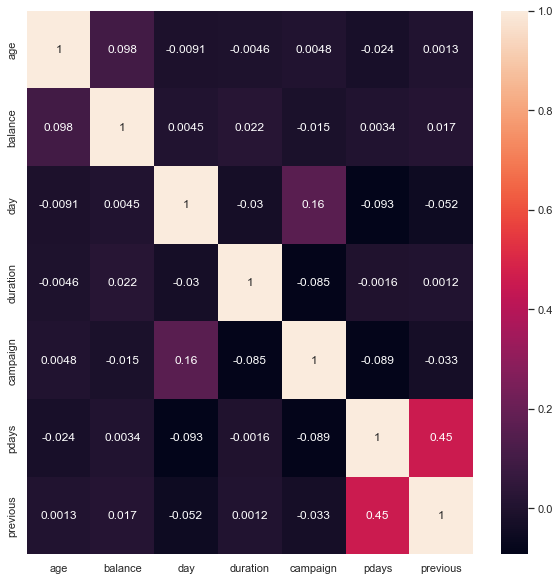

In [63]:
plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(), annot=True);

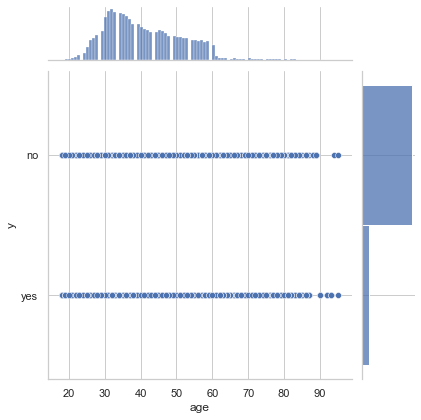

In [64]:
sns.jointplot(data=df, x=df["age"], y="y")
plt.show()

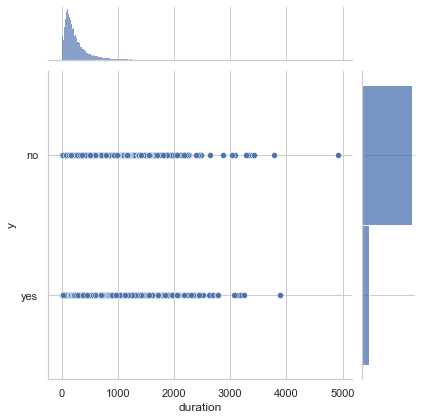

In [65]:
sns.jointplot(data=df, x=df["duration"], y="y")
plt.show()

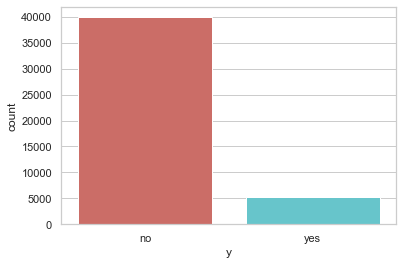

In [66]:
sns.countplot(x='y',data=df, palette='hls')
plt.show()

In [67]:
print(f"percentual não convertido", len(df[df["y"]=="no"])/len(df[df["y"]!=0]))
print(f"percentual convertido", len(df[df["y"]=="yes"])/len(df[df["y"]!=0]))

percentual não convertido 0.8830151954170445
percentual convertido 0.11698480458295547


In [68]:
df.groupby("job").mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092


In [69]:
df.groupby("marital").mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.782984,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373
married,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552
single,33.703440,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690


In [70]:
df.groupby("education").mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,45.865567,1250.949934,15.421398,255.933002,2.834331,36.081740,0.489272
secondary,39.964270,1154.880786,15.759159,258.685760,2.700802,42.353504,0.567753
tertiary,39.593640,1758.416435,16.086535,258.518532,2.825577,39.024134,0.661980
unknown,44.510501,1526.754443,15.810985,257.313947,2.849219,36.856220,0.488422


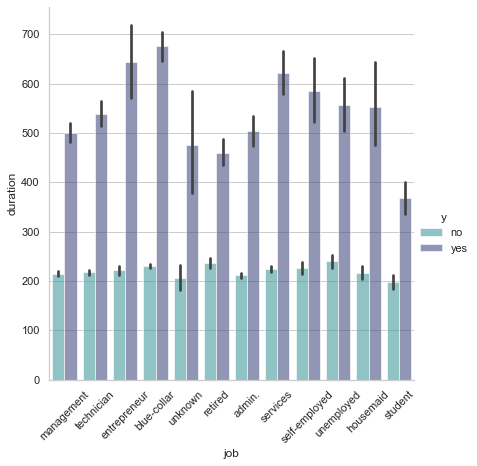

In [71]:
sns.set_theme(style="whitegrid")
sns.catplot(data=df, kind="bar", x="job", y="duration", hue="y", alpha=.6, height=6, palette="mako_r")
plt.xticks(rotation=45);

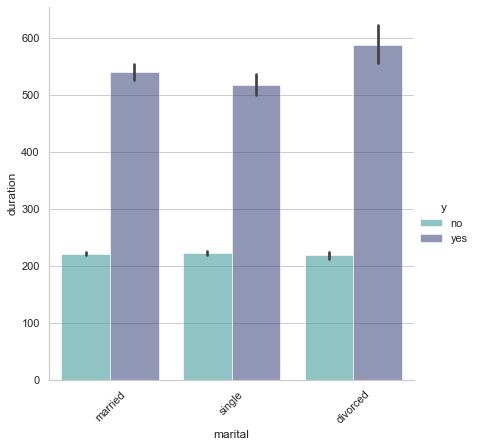

In [72]:
sns.set_theme(style="whitegrid")
sns.catplot(data=df, kind="bar", x="marital", y="duration", hue="y", alpha=.6, height=6, palette="mako_r")
plt.xticks(rotation=45);

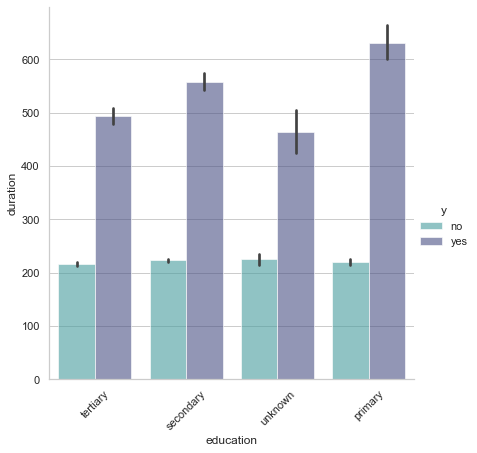

In [73]:
sns.set_theme(style="whitegrid")
sns.catplot(data=df, kind="bar", x="education", y="duration", hue="y", alpha=.6, height=6, palette="mako_r")
plt.xticks(rotation=45);

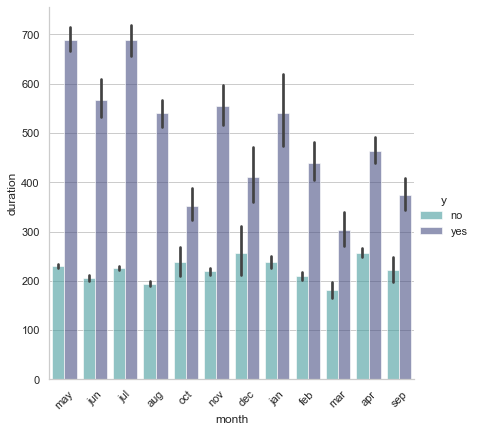

In [74]:
sns.set_theme(style="whitegrid")
sns.catplot(data=df, kind="bar", x="month", y="duration", hue="y", alpha=.6, height=6, palette="mako_r")
plt.xticks(rotation=45);

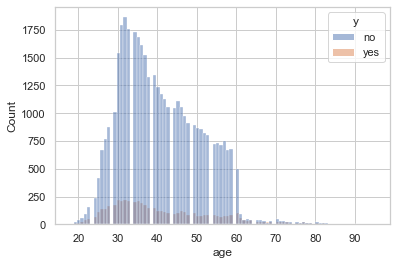

In [75]:
sns.histplot(data=df, x="age", hue="y");

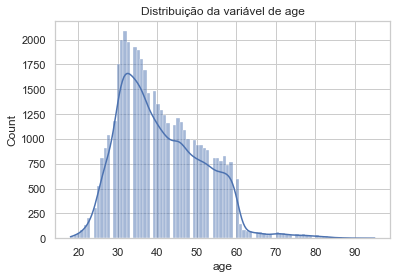

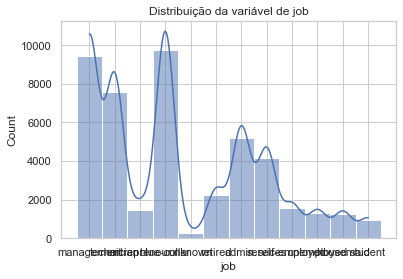

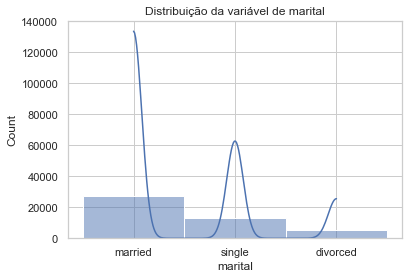

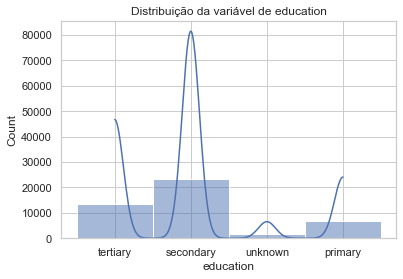

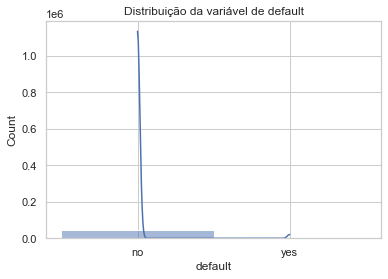

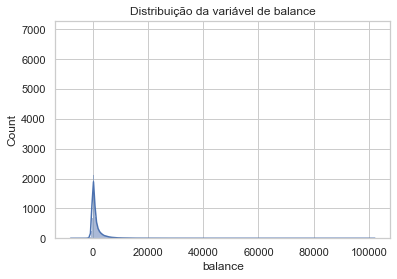

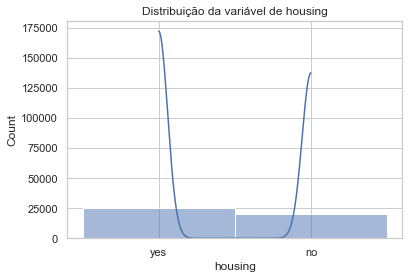

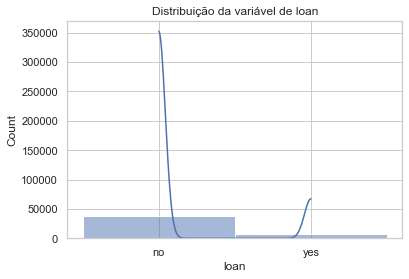

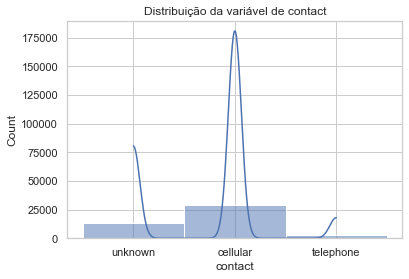

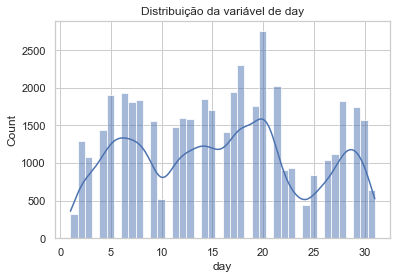

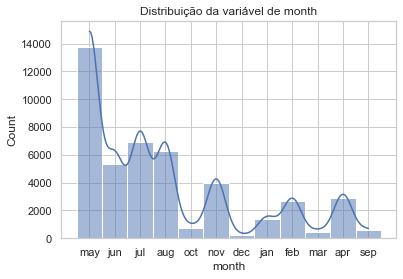

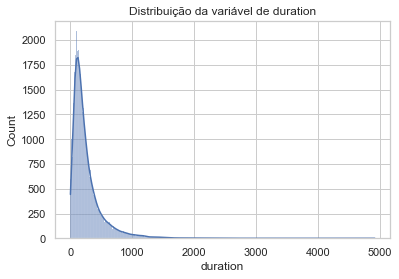

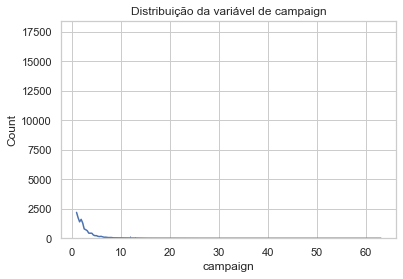

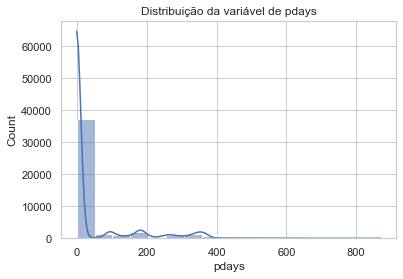

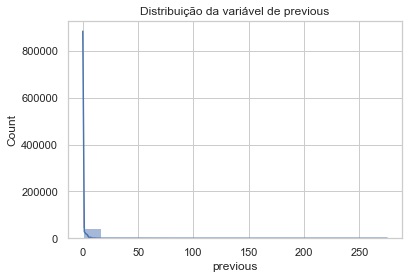

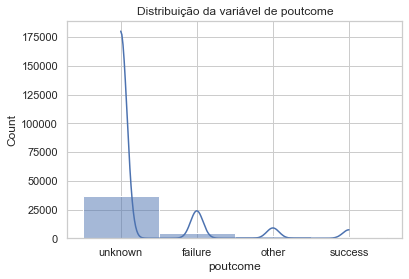

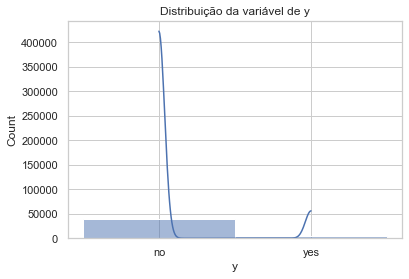

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [76]:
for col in df:

    sns.histplot(data=df, x=col, kde=True).set_title(f"Distribuição da variável de {col}")
    plt.show()
    
plt.figure(figsize=(12, 6))


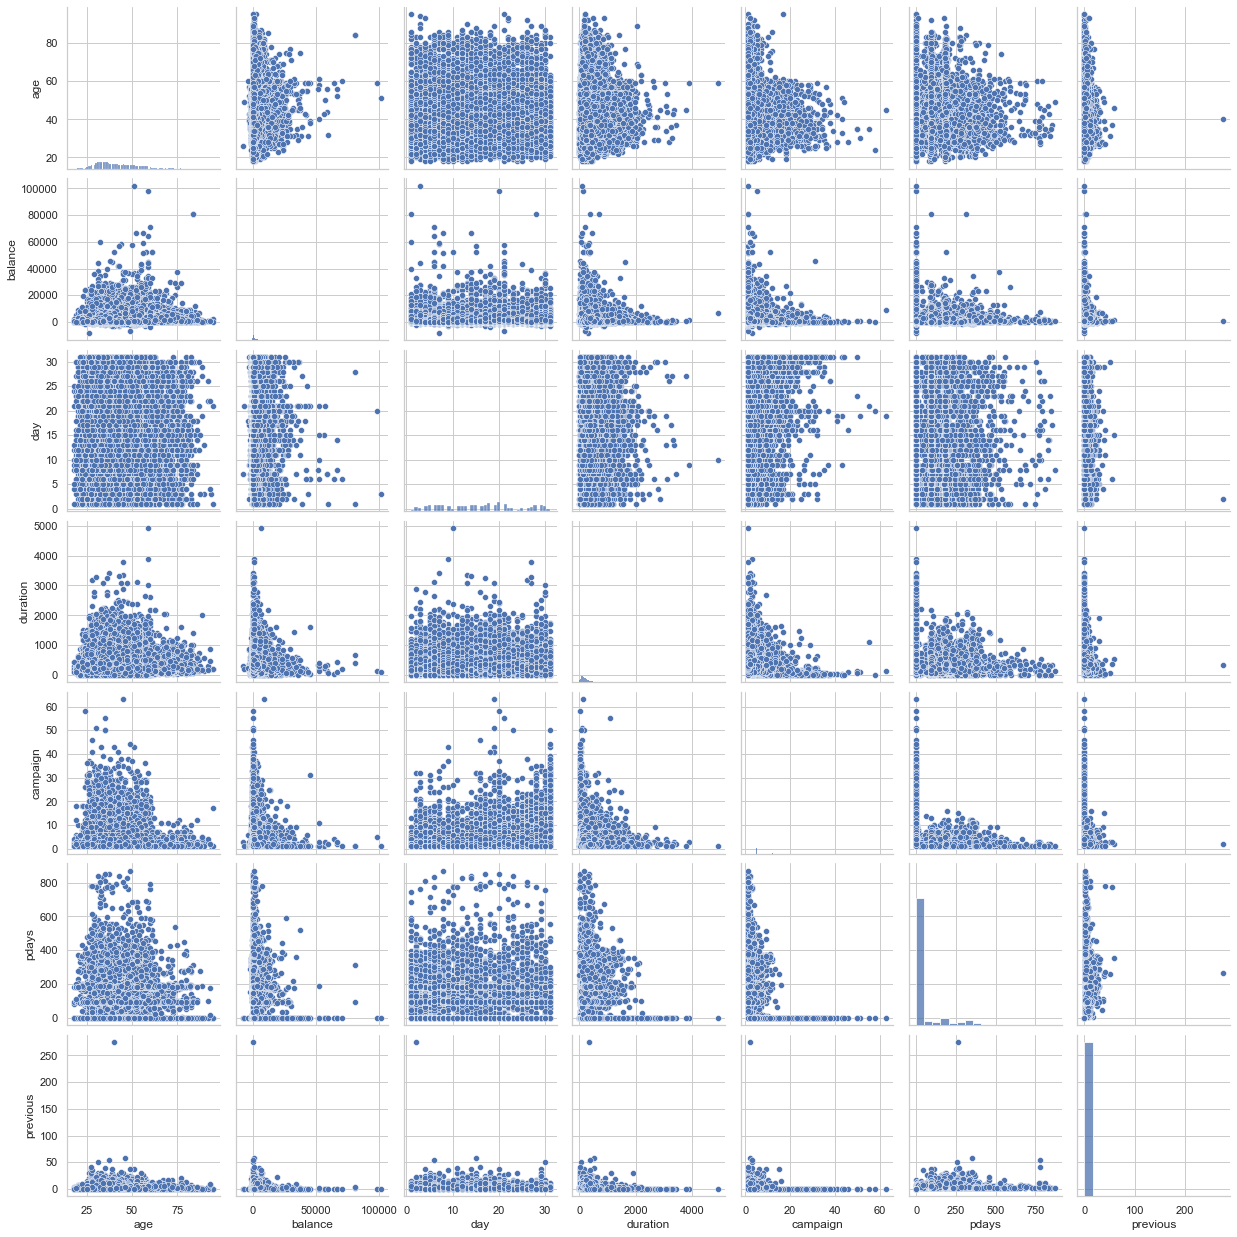

In [77]:
sns.pairplot(data=df)

## 